# Codificación de valores faltantes

Todo lo que hemos hecho sobre **Extender la API de Pandas**, graficar valores faltantes, tabular, etc. Están basados sobre algo; que mis valores faltantes tienen la forma **NA**o con Numpy **np.nan**.

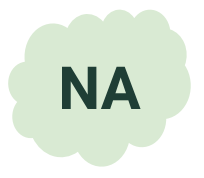

Sin embargo hay valores faltantes que toman otras formas y que si le preguntamos a Pandas, Pandas los omitirá. ¿Cómo cuales?

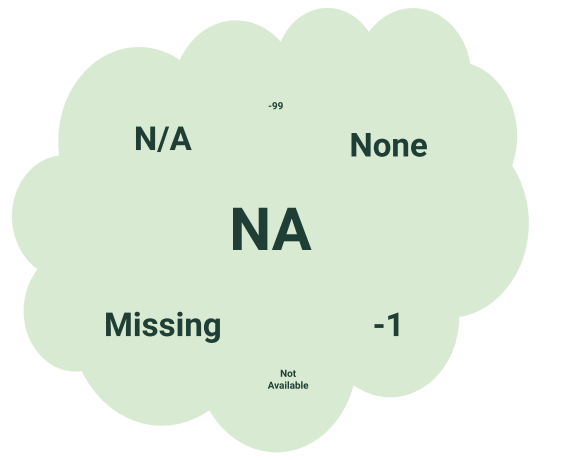

Esta forma ya es más grande y contiene mas alternativas, tenemos **textos**, **Not available**, **None**, pero también tenemos números; -**1**, **-99**. Y así sucesivamente existen diferentes formas de representar la ausencia de un valor.

Entonces si nosotros nos quedamos con las opciones que ofrece nuestro software, estaremos introduciendo ruido al analizar, por lo tanto:

>**Asumir que los valores faltantes siempre vienen en un único valor es un grave error**

Y nosotros debemos aprender como solucionarlo.

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Importando librerías

In [3]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

### Configurar el aspecto general de las gráficas del proyecto

In [4]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

### Leer conjunto de datos

In [5]:
#Cargar conjunto de datos
riskfactors = pyreadr.read_r('dataset/riskfactors.rda')

#Convertirlo a Data Frame
riskfactors_df = next(iter(riskfactors.values()))

#Borrar el diccionario
del riskfactors

In [6]:
#Verificar tipo 
#type(riskfactors_df)

#LLamar al data frame
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


### Correr missing-extension

In [7]:
#Correr extension de Pandas nuevav2
%run pandas-missing-extension-re2.py

### Valores asociados a faltantes
#### Cadenas de texto

In [ ]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [1]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

La razón debido a cuando utilizar un tipo de valor u otro se debe a cada persona y otras características, como por ejemplo una base de datos puede funcionar mejor teniendo un número que un arreglo de caracteres 

#### ¿Cómo poder encontrar valores comúnmente asociados a valores faltantes?

In [20]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


Con nuestra función que hemos creado anteriormente verificamos si existen valores faltantes.

In [11]:
#Verificando si existen faltantes
missing_data_example_df.missing.number_missing()

0

Como se pudo observar me arrojo  que no existen valores faltantes, sin embargo ya vimos el tipo de codificación y su significado en cuanto a valores faltantes, así que si hay valores faltantes, pero no los está contemplando nuestra `extension de Pandas` 

¿Cómo podemos revisar si existen valores faltantes?

La primera forma es revisando los tipos de datos.

#### Revisar tipo de datos

In [13]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

Podemos ver que hay 3 columnas:
1. Tipo objeto
2. Tipo objeto
3. Tipo entero

Sin embargo veamos el data frame:

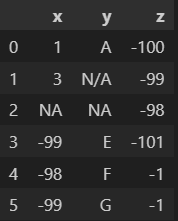

Aquí podemos ver que solo el **NA** es de tipo **string**, eso significa que probablemente nosotros estamos observando valores faltantes en esta columna porque esperamos que el valor sea un número y estamos obteniendo un objeto.

Otra manera de verificar es a traves de revisar los valores únicos de nuestro set de datos.

#### Revisar valores únicos de los datos

In [14]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

Ya que hemos visto los valores únicos y nos damos cuenta de que tienen un tipo de datos en común, pero nos aparece otro tipo. Encontraremos la incidencia del valor faltante y podremos decir:
> *"Este lo debo tratar como un valor faltante y no como un string o dependiendo del tipo que sea"*

Ya después veremos como solucionar este problema. También algo que nos interesaría es no solo verlo aplicado a una columna, sino verlo para todos nuestros datos.

¿Cómo lo hago?

In [15]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

Aplique el mismo código pero para muchos datos mediante el `apply`. Fijémonos que en la columna `y` tengo valores de string pero estoy viendo valores como `N/A` y `NA` que no pertenecen o son apropiados a mis datos, entonces lo que sigue es pensar en:
> *Tengo que remplazar los valores*

Entonces lo que vamos a hacer, es transformar estas distintas formas de valores faltantes a `NaN` para que los detecte mi software.

Vamos a hacerlo.

## Sustituyendo valores comúnmente asociados a valores faltantes
### Sustitución desde la lectura de datos 

In [16]:
pd.read_csv(
    'dataset/missing_data_enconding_example.csv',
    na_filter=True, # Parámetro que me filtra los NAN
    na_values=[-99,-1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


Fijémonos en que ahora si ha reemplazado mis valores faltantes, entonces si ahora le preguntamos a Pandas, ya me podrá identificar mis `valores nulos`.

Esta es una forma de tratar nuestro datos faltantes, por lo cual implica que ya conocemos nuestro dataset y como las personas o como yo decidí almacenar los valores faltantes.

Lo más frecuente que nos vamos a encontrar es a partir de una sustitución, es decir; ya tengo mis datos, ya los explore o los estoy explorando y vamos a querer ir **iterando y remplazando estos valores nulos**

### Sustitución  global

In [17]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99,'NA'],
        value=np.nan
    )
)

/tmp/ipykernel_197578/884111965.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  missing_data_example_df


,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


Fijémonos que han sido reemplazados los **-99** y **NA** por valores faltantes, ahora si nosotros le preguntamos a Pandas sobre valores faltantes, me arrojará un resultado positivo.

También tenemos otro caso que es la sustitución dirigida

### Sustitución dirigida
Lo que significa que solo queremos aplicar ciertas reglas de sustitución para una columna en específico.

In [21]:
missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [22]:
(
    missing_data_example_df
    .replace(
        to_replace={
            'x':{
                -99:np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


Lo aplicamos y vemos como solo se sustituye en la columna que deseábamos. Así el **-99** en la variable **Z** no se modificó y sigue siendo -99.

Es decir puede existir el caso en el que tenemos una variable numérica en donde tenga sentido que este el **-99** y así no estropeamos todo el conjunto aplicando las reglas.

Con estas formas podemos sustituir nuestros valores faltantes y poder aplicarles una codificación apropiada a caso, para después trabajar con los valores faltantes.